In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [65]:
median_house_hold=pd.read_csv("MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people_below_poverty=pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percentage_over_completed_highschool=pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
police_killing=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")
share_rice_city=pd.read_csv("ShareRaceByCity.csv",encoding="windows-1252")

#  BAR PLOT


* Visualize poverty rate of each state

In [66]:
percentage_people_below_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [67]:
percentage_people_below_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [68]:
percentage_people_below_poverty.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [69]:
# We have - value. Replace it with 0.0
percentage_people_below_poverty.poverty_rate.replace(["-"],0.0,inplace=True)

In [70]:
# poverty_rate is an object. Convert it to Float:
percentage_people_below_poverty.poverty_rate=percentage_people_below_poverty.poverty_rate.astype(float)

Text(0.5, 1.0, 'POVERTY RATE IN ORDER TO STATES')

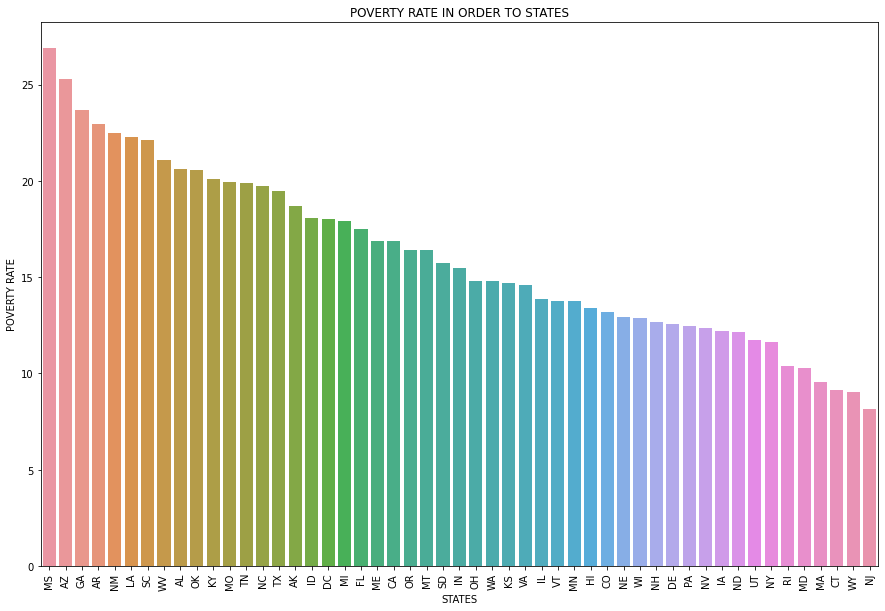

In [71]:
state_list=list(percentage_people_below_poverty["Geographic Area"].unique())
poverty_ratio_list=[]


for i in state_list:
    x=percentage_people_below_poverty[percentage_people_below_poverty["Geographic Area"]==i]
    povertyRate=sum(x.poverty_rate)/len(x)
    poverty_ratio_list.append(povertyRate)
    
    
data=pd.DataFrame({"state_list":state_list,"poverty_ratio_list":poverty_ratio_list})
new_index=(data["poverty_ratio_list"].sort_values(ascending=False)).index.values
data_sorted=data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=data_sorted["state_list"],y=data_sorted["poverty_ratio_list"])
plt.xticks(rotation=90)
plt.xlabel("STATES")
plt.ylabel("POVERTY RATE")
plt.title("POVERTY RATE IN ORDER TO STATES")

* Visualize most common 20 Name of killed people

In [72]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [73]:
police_killing.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

Text(0.5, 1.0, 'Most Common 20 Name of Killed People')

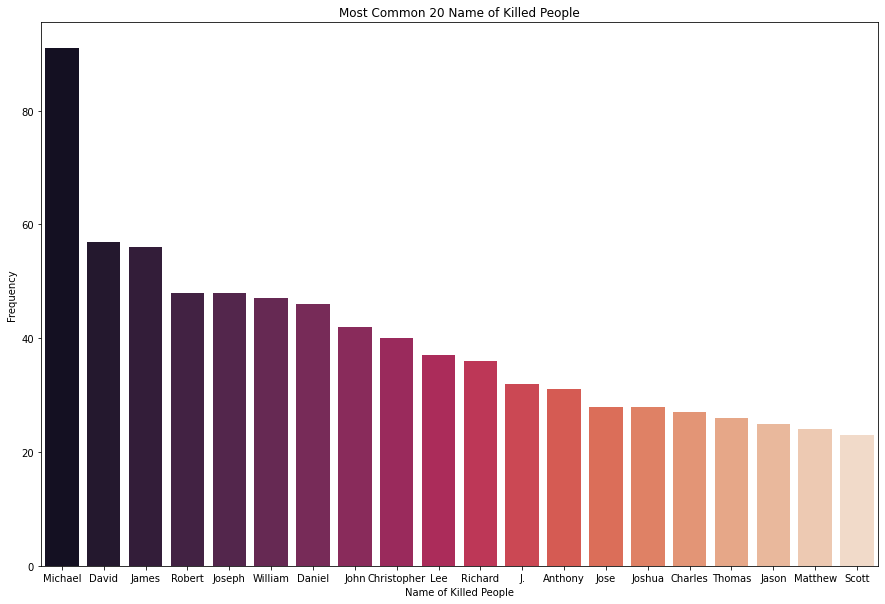

In [87]:
# Delete TK TK:
separate = police_killing.name[police_killing.name != 'TK TK'].str.split()

a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
common_names = name_count.most_common(20) 

names,frequency = zip(*common_names)
names,frequency = list(names),list(frequency)

plt.figure(figsize=(15,10))
sns.barplot(x=names,y=frequency,palette="rocket")
plt.xlabel("Name of Killed People")
plt.ylabel("Frequency")
plt.title("Most Common 20 Name of Killed People")

* Visualize High school graduation rate of the population that is older than 25 in states

Text(0.5, 1.0, 'High School Graduation Rate IN ORDER TO STATES')

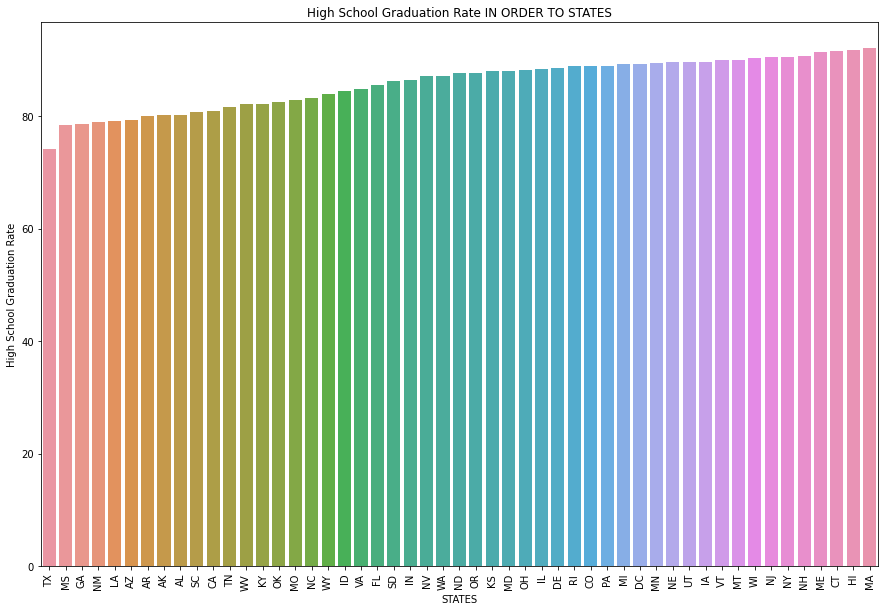

In [109]:
percentage_over_completed_highschool.percent_completed_hs.replace(["-"],0.0,inplace=True)
# Convert float:
percentage_over_completed_highschool.percent_completed_hs=percentage_over_completed_highschool.percent_completed_hs.astype(float)
state_list=list(percentage_over_completed_highschool["Geographic Area"].unique())
highschool=[]

for i in state_list:
    x=percentage_over_completed_highschool[percentage_over_completed_highschool["Geographic Area"]==i]
    highschool_rate=sum(x.percent_completed_hs)/len(x)
    highschool.append(highschool_rate)

data=pd.DataFrame({"state_list":state_list,"highschool":highschool})
new_index=(data["highschool"].sort_values(ascending=True)).index.values
data_sorted2=data.reindex(new_index)


plt.figure(figsize=(15,10))
sns.barplot(x=data_sorted2["state_list"],y=data_sorted2["highschool"])
plt.xticks(rotation=90)
plt.xlabel("STATES")
plt.ylabel("High School Graduation Rate")
plt.title("High School Graduation Rate IN ORDER TO STATES")

In [88]:
percentage_over_completed_highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


## HORIZONTAL BAR PLOT

* Visualize percentage of states population according to races.

In [89]:
share_rice_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [92]:
share_rice_city.replace(["-"],0.0,inplace=True)
share_rice_city.replace(["(X)"],0.0,inplace=True)

In [93]:
# Convert float:
share_rice_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]]=share_rice_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

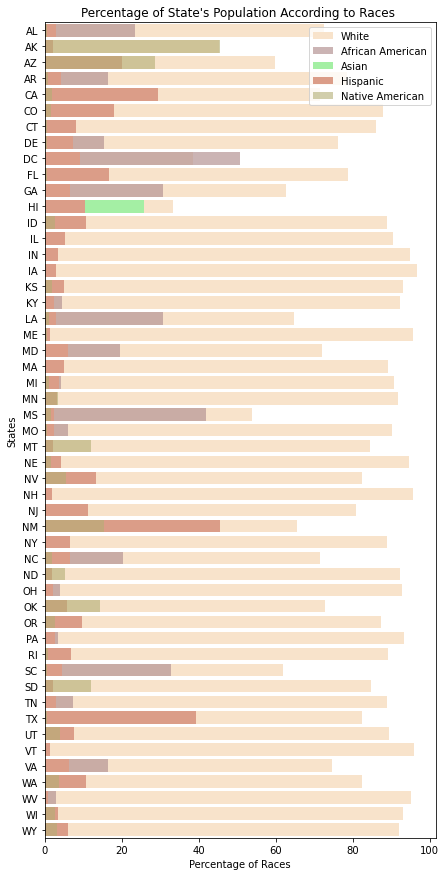

In [101]:
state_list=list(share_rice_city["Geographic area"].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
for i in state_list:
    x=share_rice_city[share_rice_city["Geographic area"]==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    
f,ax=plt.subplots(figsize=(7,15))
sns.barplot(x=share_white,y=state_list,label="White",color="bisque")
sns.barplot(x=share_black,y=state_list,label="African American",color="rosybrown",alpha=0.7)
sns.barplot(x=share_asian,y=state_list,label="Asian",color="palegreen")
sns.barplot(x=share_hispanic,y=state_list,label="Hispanic",color="darksalmon")
sns.barplot(x=share_native_american,y=state_list,label="Native American",color="darkkhaki",alpha=0.6)

ax.legend(loc="upper right",frameon=True)

ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

#  POINT PLOT

* Visualize high school graduation rate VS poverty rate of each state.

In [103]:
data_sorted.head()
# You use it in first bar plot.

,state_list,poverty_ratio_list
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [110]:
data_sorted2.head()

,state_list,highschool
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


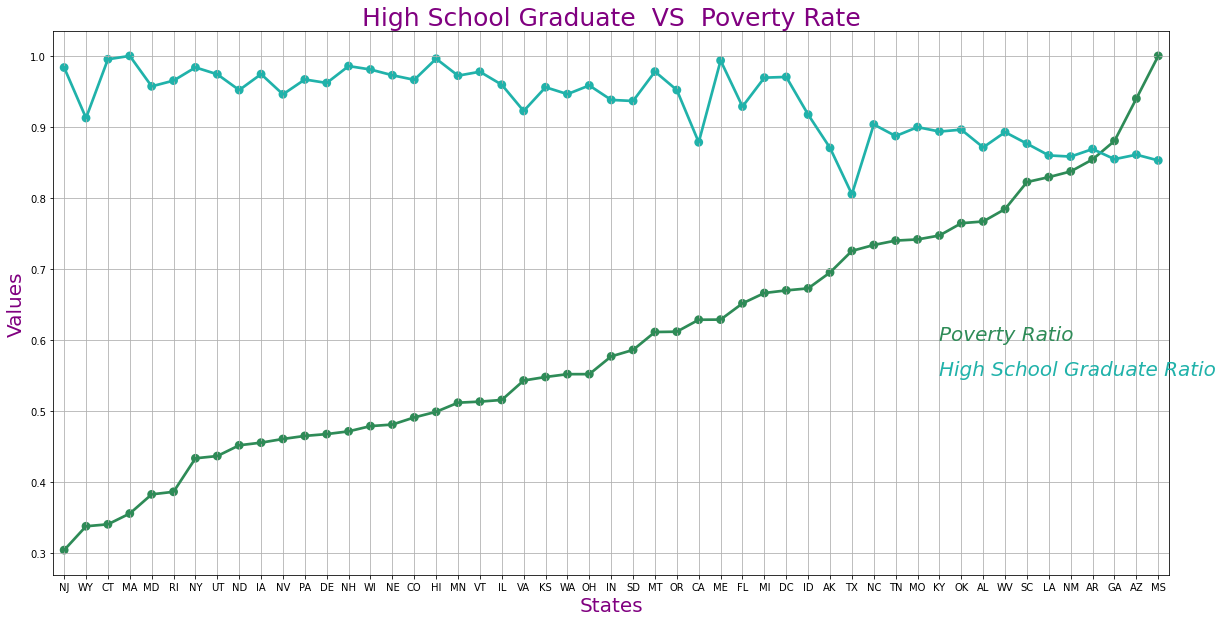

In [120]:
data_sorted["poverty_ratio_list"]=data_sorted["poverty_ratio_list"]/max(data_sorted["poverty_ratio_list"])
data_sorted2["highschool"]=data_sorted2["highschool"]/max(data_sorted2["highschool"])

data=pd.concat([data_sorted,data_sorted2["highschool"]],axis=1)
data.sort_values("poverty_ratio_list",inplace=True)

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x="state_list",y="poverty_ratio_list",data=data,color="seagreen")
sns.pointplot(x="state_list",y="highschool",data=data,color="lightseagreen")

plt.text(40,0.6,"Poverty Ratio",color="seagreen",fontsize=20,style="italic")
plt.text(40,0.55,"High School Graduate Ratio",color="lightseagreen",fontsize=20,style="italic")

plt.xlabel("States",color="purple",fontsize=20)
plt.ylabel("Values",color="purple",fontsize=20)
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 25,color="purple")
plt.grid()

# JOIN PLOT

C:\Users\hilal.yuksel\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


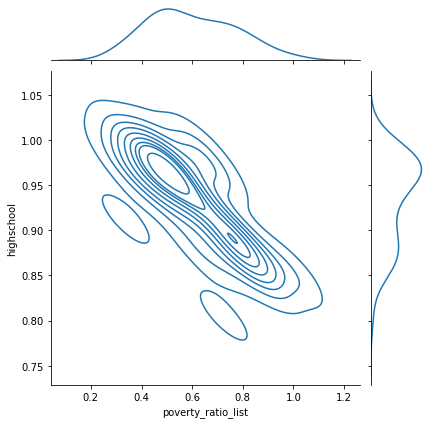

In [127]:
sns.jointplot(data.poverty_ratio_list,data.highschool,kind="kde");
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }

# PIE CHART

* Visualize race rates according in kill data

In [128]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [129]:
police_killing.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

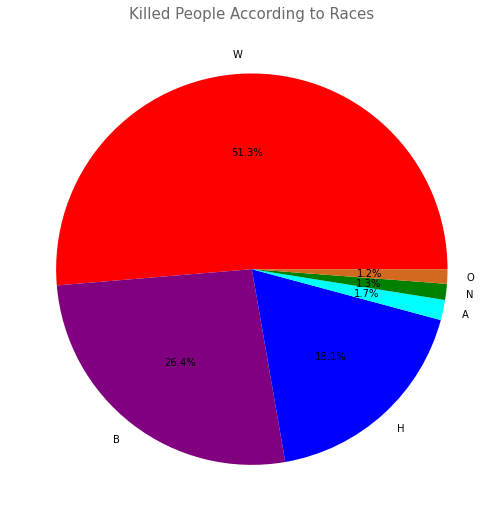

In [143]:
police_killing.race.dropna(inplace=True)
labels=police_killing.race.value_counts().index
colors=["red","purple","blue","cyan","green","chocolate"]
explode=[0,0,0,0,0,0]
sizes=police_killing.race.value_counts().values

plt.figure(figsize=(9,9))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%")

plt.title('Killed People According to Races',color = 'dimgray',fontsize = 15)

# LM PLOT

* Visualize high school graduation rate vs Poverty rate of each state.

In [144]:
data.head()

,state_list,poverty_ratio_list,highschool
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


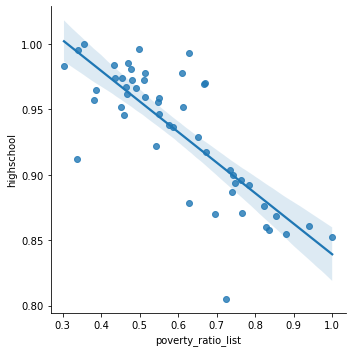

In [148]:
sns.lmplot(x="poverty_ratio_list",y="highschool",data=data);

# KDE PLOT

* Visualize high school graduation rate vs Poverty rate of each state.

C:\Users\hilal.yuksel\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'High School Graduate  VS  Poverty Rate')

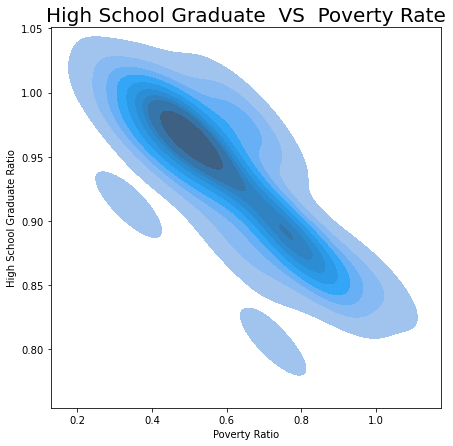

In [155]:
plt.figure(figsize=(7,7))
sns.kdeplot(data.poverty_ratio_list,data.highschool,cut=2,shade=True);
plt.xlabel("Poverty Ratio",fontsize=10)
plt.ylabel("High School Graduate Ratio",fontsize=10)
plt.title("High School Graduate  VS  Poverty Rate",fontsize=20)

# VIOLIN PLOT

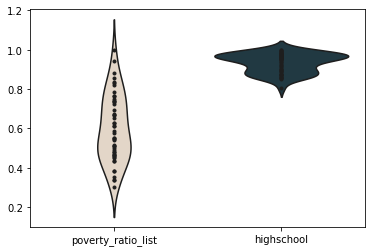

In [159]:
pal = sns.cubehelix_palette(2, rot=-.7, dark=.2)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

# HEATMAP

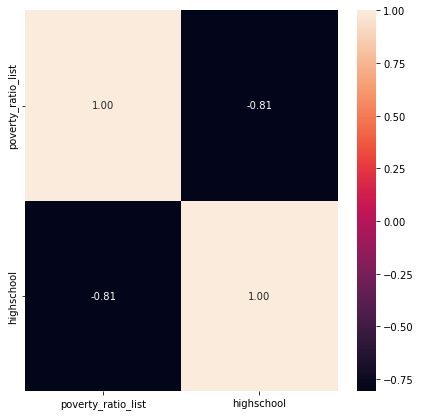

In [163]:
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(data=data.corr(),annot=True,fmt=".2f",ax=ax);

# BOX PLOT

In [164]:
police_killing.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='age'>

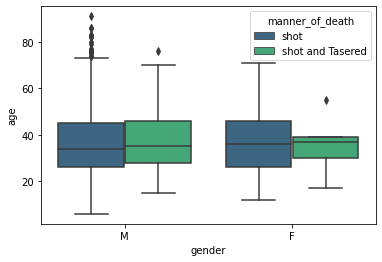

In [165]:
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=police_killing,palette="viridis")

# SWARM PLOT

C:\Users\hilal.yuksel\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


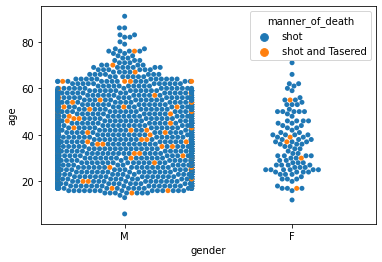

In [167]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=police_killing);

# PAIR PLOT

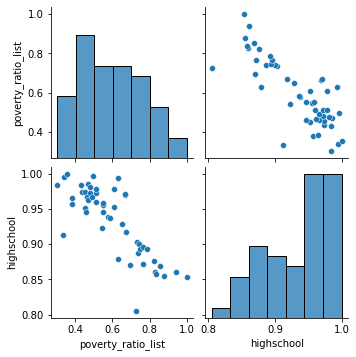

In [168]:
sns.pairplot(data);

# COUNT PLOT

C:\Users\hilal.yuksel\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


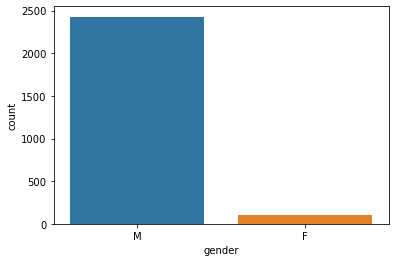

In [171]:
sns.countplot(police_killing.gender);

In [175]:
armed=police_killing.armed.value_counts()[:10]

Text(0, 0.5, 'Number of Weapon')

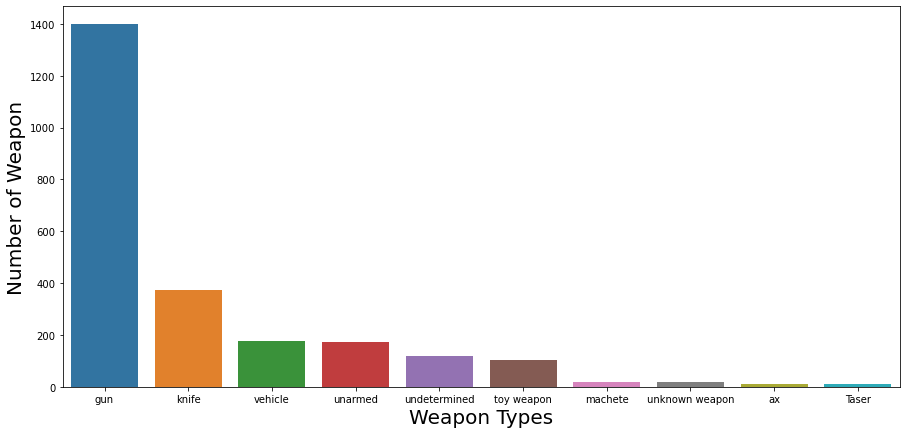

In [178]:
plt.figure(figsize=(15,7))
sns.barplot(x=armed.index,y=armed.values)
plt.xlabel('Weapon Types',fontsize=20)
plt.ylabel('Number of Weapon',fontsize=20)

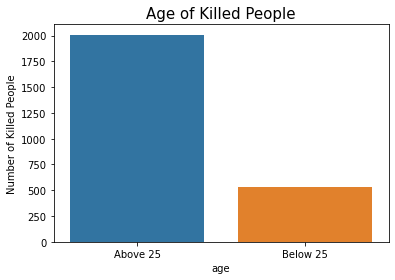

In [181]:
above25 =['Above 25' if i >= 25 else 'Below 25' for i in police_killing.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of Killed People',fontsize=15);

Text(0.5, 1.0, 'Most Dangerous Cities')

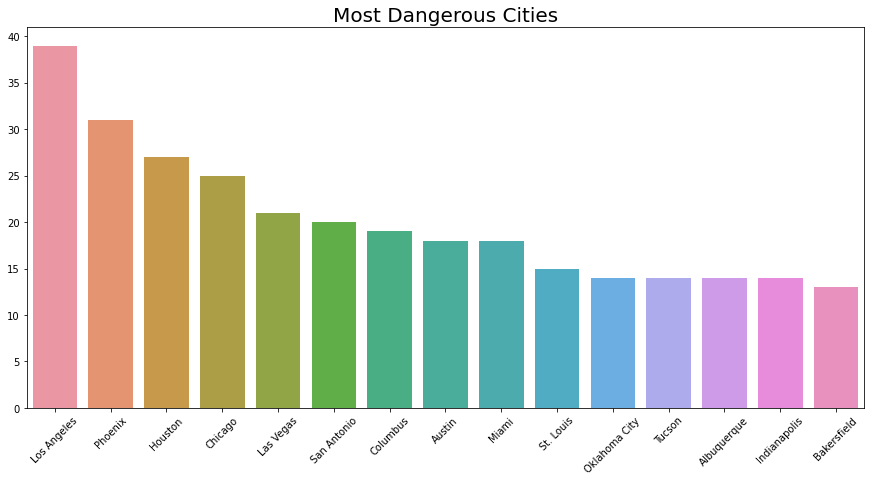

In [187]:
cities=police_killing.city.value_counts()[:15]
plt.figure(figsize=(15,7))
sns.barplot(x=cities.index,y=cities.values)
plt.xticks(rotation=45)
plt.title('Most Dangerous Cities',fontsize=20)